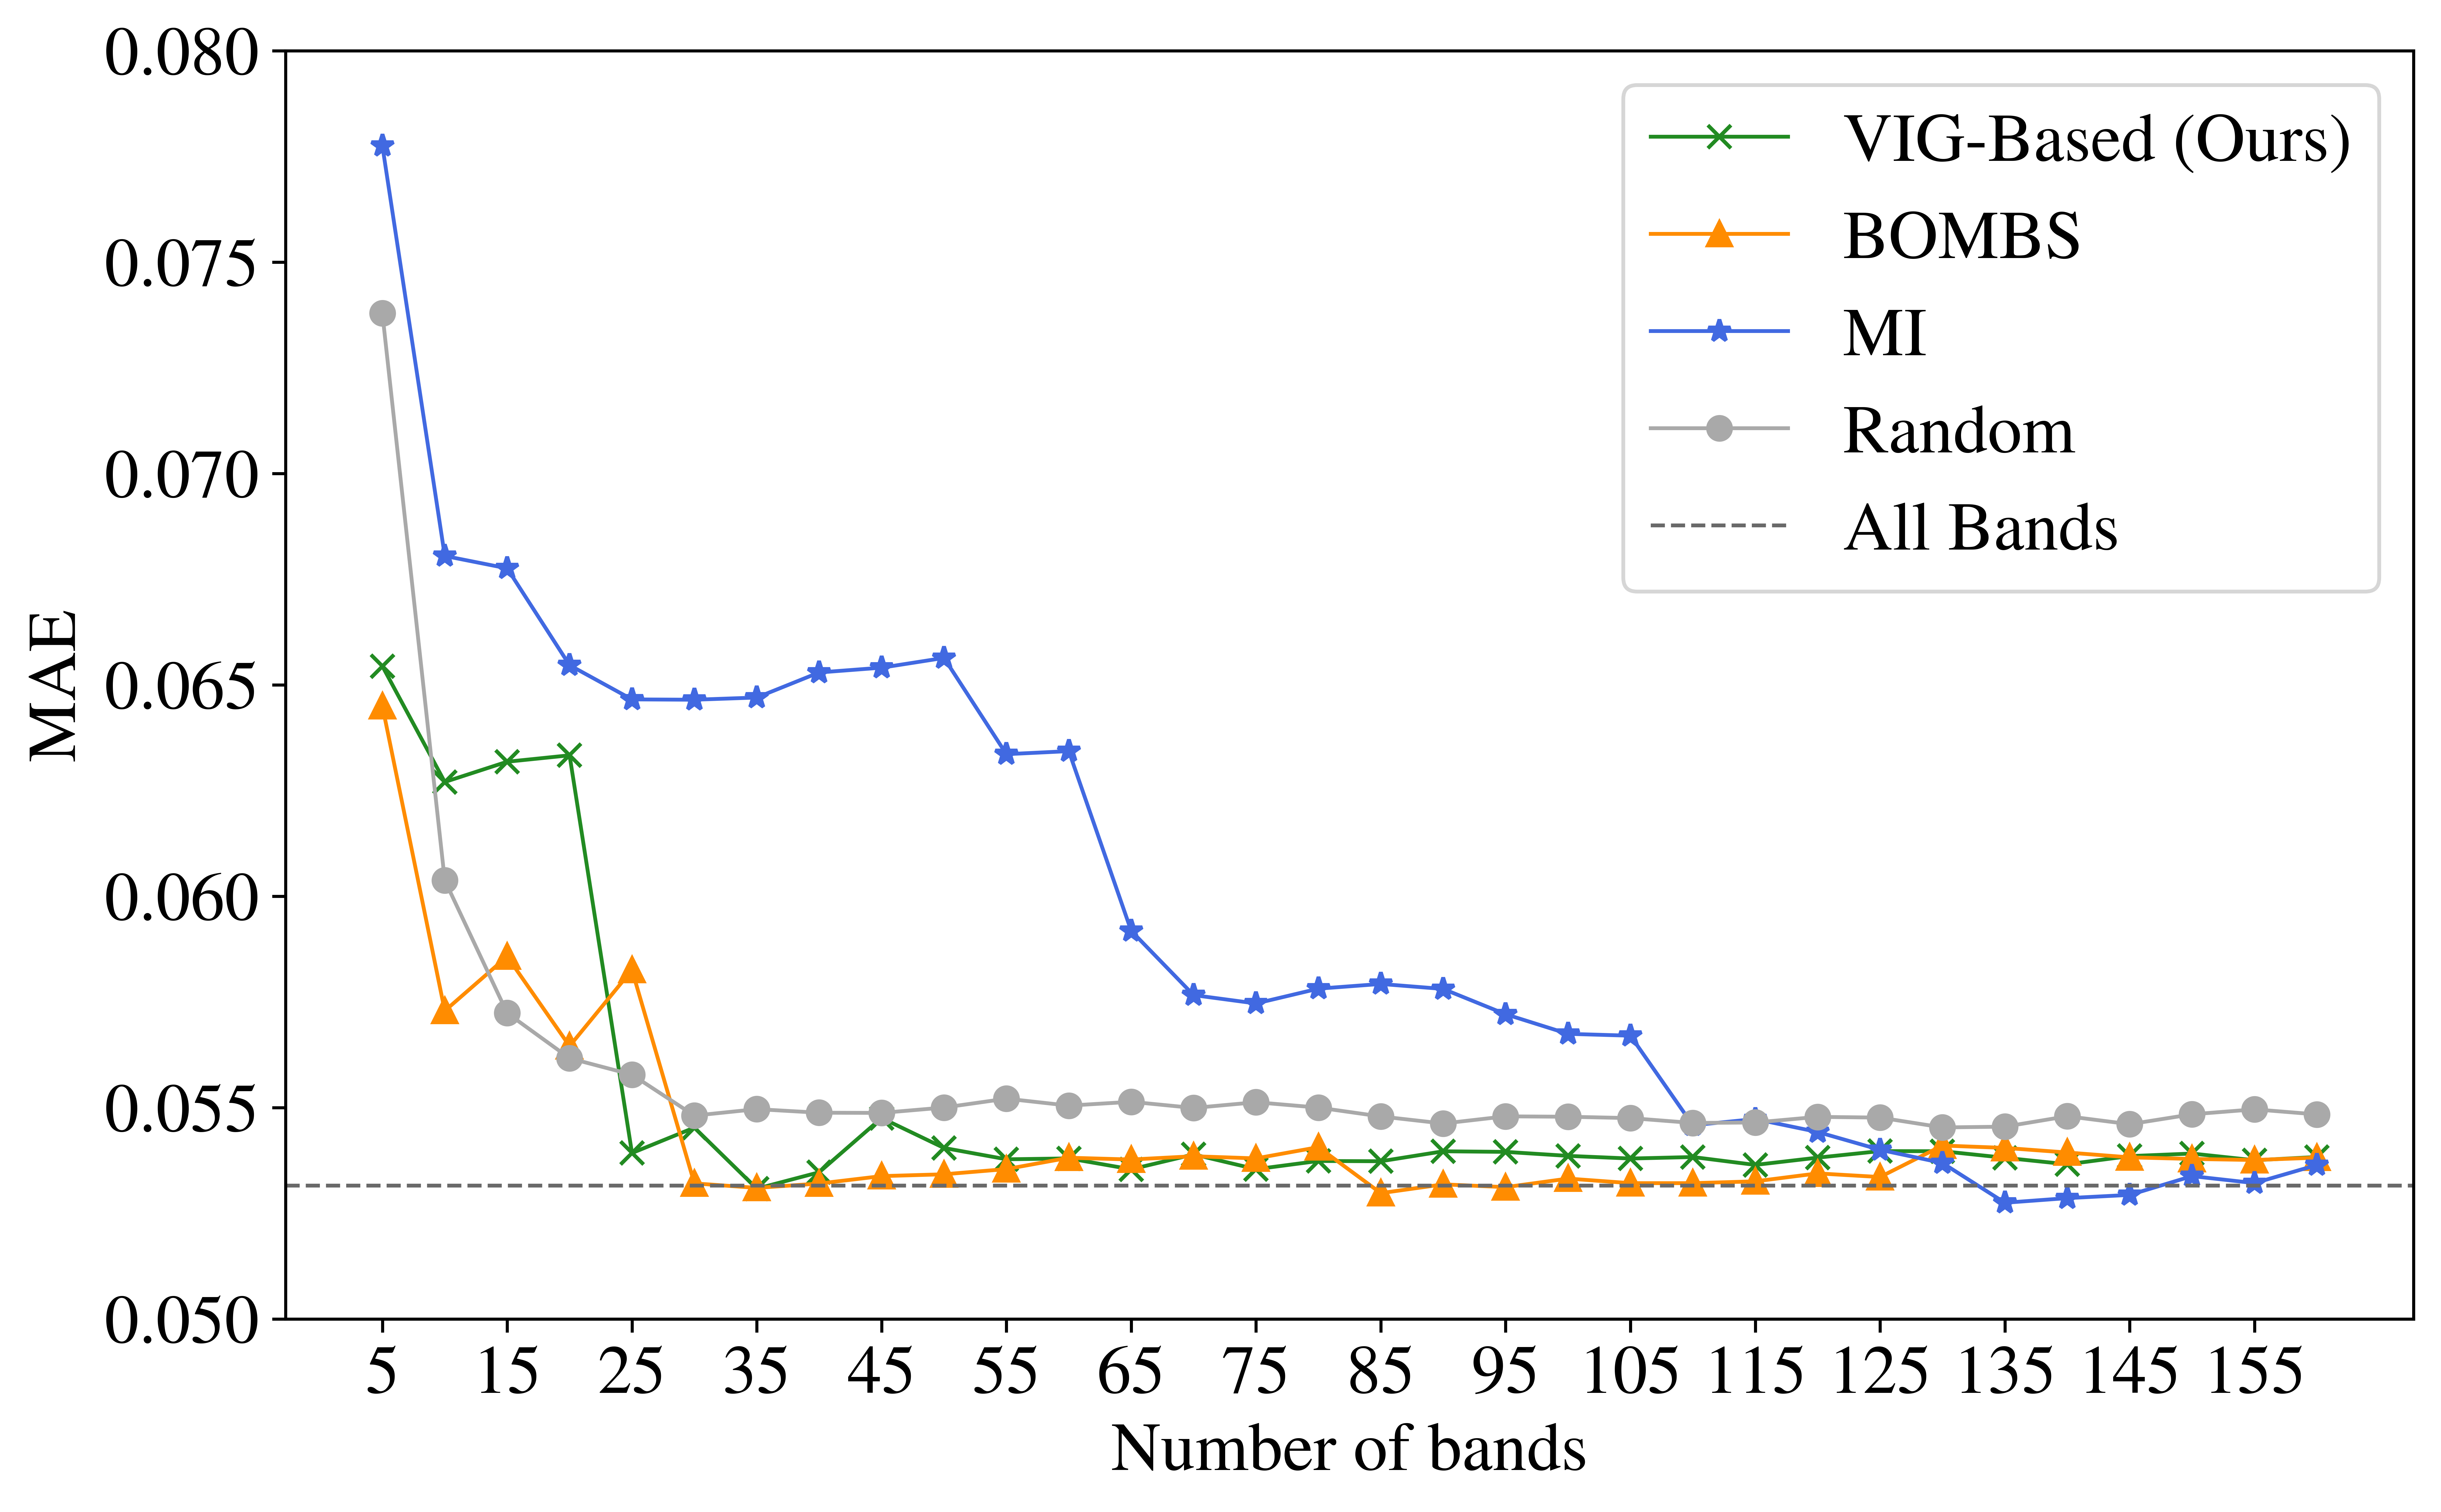

In [35]:
bombs_dir = "results_test_frac_band_sel_estimators_4_bombs"
mi_dir = "results_test_frac_band_sel_estimators_4_mi"
vig_dir = "results_test_frac_band_sel_estimators_4_vig"
random_dir = "results_test_frac_band_sel_estimators_4_random"


import pandas as pd



import numpy as np



global_mae_vig_results = []


global_mae_bombs_results = []


global_mae_mi_results = []

global_mae_random_results = []

for n_bands in range(5, 161, 5):
    mae_bombs_results, mae_vig_results, mae_mi_results = [], [], []
    mae_random_results = []

    for i in range(20):
        b = pd.read_csv(
            f"{bombs_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )


        v = pd.read_csv(
            f"{vig_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )


        m = pd.read_csv(
            f"{mi_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )

        pc = pd.read_csv(
            f"{random_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )

        mae_bombs_results.append(b["mae_mean"].item())


        mae_vig_results.append(v["mae_mean"].item())

        mae_mi_results.append(m["mae_mean"].item())

        mae_random_results.append(pc["mae_mean"].item())

    global_mae_bombs_results.append(np.mean(mae_bombs_results).item())


    global_mae_vig_results.append(np.mean(mae_vig_results).item())
    global_mae_mi_results.append(np.mean(mae_mi_results).item())
    global_mae_random_results.append(np.mean(mae_random_results).item())


import matplotlib.pyplot as plt


import numpy as np
import matplotlib

plt.rcParams['font.size'] = 18  # You can adjust this value


matplotlib.rcParams["mathtext.fontset"] = "stix"


matplotlib.rcParams["font.family"] = "STIXGeneral"



# Increase size and quality


fig, ax = plt.subplots(figsize=(10, 6), dpi=1000)



# Create the line plot

ax.plot(
    list(range(5, 161, 5)),
    global_mae_vig_results,
    label=r"VIG-Based (Ours)",
    marker="x",
    color="forestgreen",
    linewidth=1,
)


ax.plot(
    list(range(5, 161, 5)),
    global_mae_bombs_results,
    label=r"BOMBS",
    marker="^",
    color="darkorange",
    linewidth=1,
)




ax.plot(
    list(range(5, 161, 5)),
    global_mae_mi_results,
    label=r"MI",
    marker="*",
    color="royalblue",
    linewidth=1,
)


ax.plot(
    list(range(5, 161, 5)),
    global_mae_random_results,
    label=r"Random",
    marker="o",
    color="darkgray",
    linewidth=1,
)

all_bands_mae = np.mean(

    [
        pd.read_csv(
            f"results_test_frac_band_sel_estimators_4_vig/n_clusters-all,test_size-band_sel,random_state-{i}.csv"
        )["mae_mean"].item()
        for i in range(5)
    ]
)



plt.axhline(
    y=all_bands_mae, color="dimgray", linestyle="--", linewidth=1, label="All Bands"
)



plt.yticks(np.arange(0.05, 0.081, 0.005))
# Add labels and legend
ax.set_xlabel("Number of bands")

plt.xticks(list(range(5, 161, 10)))

ax.set_ylabel("MAE")


ax.legend()



# Save the plot to a file (optional)


plt.savefig("mae_plot_final.png", bbox_inches="tight")

plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Read the data from the provided CSV-like string
import matplotlib

plt.rcParams['font.size'] = 18  # You can adjust this value


matplotlib.rcParams["mathtext.fontset"] = "stix"


matplotlib.rcParams["font.family"] = "STIXGeneral"
# Create a DataFrame from the data
df = pd.read_csv(r"C:\Users\luktu\Downloads\metrics.csv")

# Separate data for the two lines
failed_data = df[df['key'] == 'val_NUM_MISSES_epoch_failed']
success_data = df[df['key'] == 'val_NUM_MISSES_epoch_success']

# Plot the lines
plt.figure(figsize=(10, 6), dpi=1200)
plt.plot(failed_data['step'], failed_data['value'], label='Failure PCAPs', marker='x',color="red")
plt.plot(success_data['step'], success_data['value'], label='Success PCAPs', marker='^',color="green")

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.legend()

# Use Latex font for text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Display the plot
plt.savefig("val_curve.png", bbox_inches="tight")